# Fitting Models to Data 

In this example, we want to find the function of a given form that best fits a large number of data points. In order to do that, we use Python to compute the least squares approximation to a linear system. 

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import math

## Toronto Stock Exchange Index

We will use data from the Toronto Stock Exchange (available via [open.canada.ca](https://open.canada.ca/en/using-open-data)). More specifically, we use the monthly values of the S&P/TSX Composite Index over the past 10 years (2013-10 to 2023-09). This index is based on around 250 of the largest Canadian companies, so it can be used as an indicator of the overall strength of the economy in Canada. 

First, we input our 120 data points in Python as a 120x2 matrix, with time points in the first column and the corresponding index values in the second column. 

In [2]:
TSX = np.array([[2013.75, 12787.20], [2013.83333333333, 13361.26], [2013.91666666667, 13395.40], [2014, 13621.55], [2014.08333333333, 13694.94], [2014.16666666667, 14209.59], [2014.25, 14335.31], [2014.33333333333, 14651.87], [2014.41666666667, 14604.16], [2014.5, 15146.01], [2014.58333333333, 15330.74], [2014.66666666667, 15625.73], [2014.75, 14960.51], [2014.83333333333, 14613.32], [2014.91666666667, 14744.70], [2015, 14632.44], [2015.08333333333, 14673.48], [2015.16666666667, 15234.34], [2015.25, 14902.44], [2015.33333333333, 15224.52], [2015.41666666667, 15014.09], [2015.5, 14553.33], [2015.58333333333, 14468.44], [2015.66666666667, 13859.12], [2015.75, 13306.96], [2015.83333333333, 13529.17], [2015.91666666667, 13469.83], [2016, 13009.95], [2016.08333333333, 12822.13], [2016.16666666667, 12860.35], [2016.25, 13494.36], [2016.33333333333, 13951.45], [2016.41666666667, 14065.78], [2016.5, 14064.54], [2016.58333333333, 14582.74], [2016.66666666667, 14597.95], [2016.75, 14725.86], [2016.83333333333, 14787.27], [2016.91666666667, 15082.85], [2017, 15287.59], [2017.08333333333, 15385.96], [2017.16666666667, 15399.24], [2017.25, 15547.75], [2017.33333333333, 15586.13], [2017.41666666667, 15349.91], [2017.5, 15182.19], [2017.58333333333, 15143.87], [2017.66666666667, 15211.87], [2017.75, 15634.94], [2017.83333333333, 16025.59], [2017.91666666667, 16067.48], [2018, 16209.13], [2018.08333333333, 15951.67], [2018.16666666667, 15442.68], [2018.25, 15367.29], [2018.33333333333, 15607.88], [2018.41666666667, 16061.50], [2018.5, 16277.73], [2018.58333333333, 16434.01], [2018.66666666667, 16262.88], [2018.75, 16073.14], [2018.83333333333, 15027.28], [2018.91666666667, 15197.82], [2019, 14322.86], [2019.08333333333, 15540.60], [2019.16666666667, 15999.01], [2019.25, 16102.09], [2019.33333333333, 16580.73], [2019.41666666667, 16037.49], [2019.5, 16382.20], [2019.58333333333, 16406.56], [2019.66666666667, 16442.07], [2019.75, 16658.63], [2019.83333333333, 16483.16], [2019.91666666667, 17040.20], [2020, 17063.43], [2020.08333333333, 17318.49], [2020.16666666667, 16263.05], [2020.25, 13378.75], [2020.33333333333, 14780.74], [2020.41666666667, 15192.83], [2020.5, 15515.22], [2020.58333333333, 16169.20], [2020.66666666667, 16514.44], [2020.75, 16121.38], [2020.83333333333, 15580.64], [2020.91666666667, 17190.25], [2021, 17433.36], [2021.08333333333, 17337.02], [2021.16666666667, 18060.26], [2021.25, 18700.67], [2021.33333333333, 19108.33], [2021.41666666667, 19730.99], [2021.5, 20165.58], [2021.58333333333, 20287.80], [2021.66666666667, 20582.94], [2021.75, 20070.25], [2021.83333333333, 21037.07], [2021.91666666667, 20659.99], [2022, 21222.84], [2022.08333333333, 21098.29], [2022.16666666667, 21126.36], [2022.25, 21890.16], [2022.33333333333, 20762.00], [2022.41666666667, 20729.34], [2022.5, 18861.36], [2022.58333333333, 19692.92], [2022.66666666667, 19330.81], [2022.75, 18444.22], [2022.83333333333, 19426.14], [2022.91666666667, 20453.26], [2023, 19384.92], [2023.08333333333, 20767.38], [2023.16666666667, 20221.19], [2023.25, 20099.89], [2023.33333333333, 20636.54], [2023.41666666667, 19572.24], [2023.5, 20155.29], [2023.58333333333, 20626.64], [2023.66666666667, 20292.62]])

Next, let's plot the data points to see how the TSX index has changed over the last ten years. 

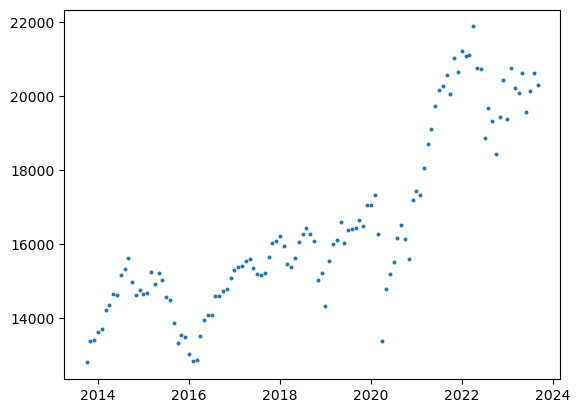

In [3]:
t = TSX[:,[0]]
y = TSX[:,[1]]
plt.scatter(t,y,alpha=1,lw=0,s=8);
plt.show()

### Linear regression

Suppose we want to find a linear function 
$$y(t) = c_0 + c_1 t$$ 

that describes the value of the TSX index as a function of time. Obviously, we cannot find a single line that fits all the 120 points. Instead, we determine the line that gives the best possible fit. 
This means that we want to approximate the system $A \vec{c} = \vec{y}$, where 
$$ A = \begin{bmatrix} 1 & t_1 \\ 1 & t_2 \\ \vdots & \vdots \\ 1 & t_{120} \end{bmatrix}, \; 
\vec{c} = \begin{bmatrix} c_0 \\ c_1\end{bmatrix}, \; \mathrm{and} \;\; 
\vec{y} = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_{120} \end{bmatrix}, $$

to find the coefficients $c_0$ and $c_1$ of the linear function. 

Typically we consider the best fit to be the line with the smallest sum of squared errors, 

$$ SSE = \sum_{i=1}^{120} (y_i - (c_0 + c_1 t_i))^2 = \lVert \vec{y} - A \vec{c} \rVert ^2. $$

To find this least squares solution, we can either solve the *normal equations* or use the *QR decomposition*. Let's take the normal equation approach for now: in this case we find the unique solution to the system 

$$A^T A \vec{c} = A^T \vec{y}.$$

In [4]:
A = np.column_stack([np.ones(120),t])
c = la.solve(A.T @ A, A.T @ y)
print(c)

[[-1.43877955e+06]
 [ 7.20874856e+02]]



We have now found the coefficients $c_0$ and $c_1$ for the line with best fit. Let's plot this line together with the data points. 

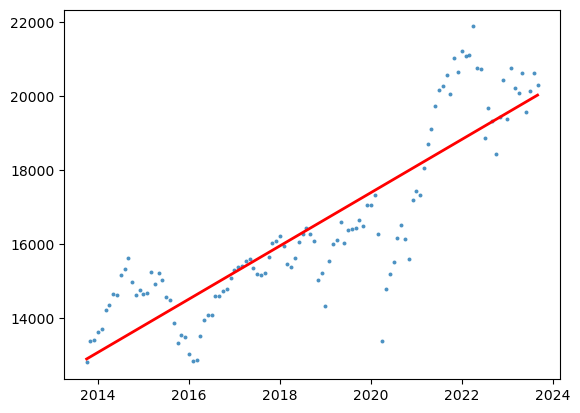

In [5]:
tl = np.linspace(2013.75,2023.75,120, endpoint=False)
yl = c[0] + c[1]*tl
plt.plot(tl,yl,'r',linewidth=2)
plt.scatter(t,y,alpha=0.8,lw=0,s=8);
plt.show()

As we can see, the red line gives a fairly good linear approximation to our large set of data points (in fact, the best possible line with respect to the sum of squared errors). Note that the index value shows quite significant fluctuations, though, so the linear function is not necessarily a very accurate description of the index price at all times. However, it could still be useful as a description of the general trend of the stock market. 
(When making long-term investments, we maybe do not care much about the smaller fluctuations, but rather we are interested in the long-term trend of the market.) 

We can compute the norm of the residual vector (the difference between values on the line and the data points) to measure how well the line fits the data. The value won't maybe tell us much on its own, but we can use it to compare with the fit of other functions to the same data. 

In [6]:
np.sqrt(np.sum((yl-y.T)**2))

13138.774067621729

### Polynomial regression

We can also use the same method to find the polynomial function of a certain degree that best fits the TSX data. For instance, let's consider finding a quartic function $y(t) = c_0 +c_1 t +c_2 t^2 +c_3 t^3 +c_4 t^4$, this time using the QR decomposition ([numpy.linalg.qr](https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html)). 

The least squares approximation $\vec{c}$ is the solution to 

$$R_1 \vec{c} = Q_1^T \vec{y},$$

where $A_2 = Q_1 R_1$ is the thin QR decomposition of the Vandermonde matrix
$$ A_2 = \begin{bmatrix} 1 & t_1 & t_1^2 & t_1^3 & t_1^4 \\ 1 & t_2 & t_2^2 & t_2^3 & t_2^4 \\ \vdots & \vdots \\ 1 & t_{120} & t_{120}^2 & t_{120}^3 & t_{120}^4 \end{bmatrix}.$$

In [7]:
A2 = np.column_stack([np.ones(120),t,t**2,t**3,t**4])
Q1,R1 = la.qr(A2,mode='economic')
b = Q1.T @ y
cc = la.solve(R1,b[:5])
print(cc)

[[-1.09728099e+14]
 [ 2.17434694e+11]
 [-1.61573634e+08]
 [ 5.33616227e+04]
 [-6.60873332e+00]]


/tmp/ipykernel_219/2384024634.py:4: LinAlgWarning: Ill-conditioned matrix (rcond=1.71132e-25): result may not be accurate.
  cc = la.solve(R1,b[:5])


We get a warning that the matrix is ill-conditioned, but we will ignore the warning for now, since this is only an illustration. 

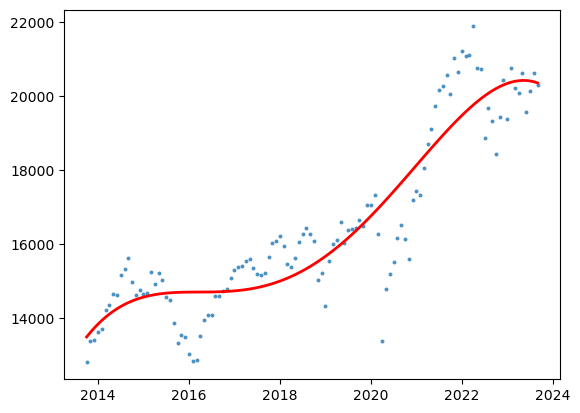

In [8]:
tq = np.linspace(2013.75,2023.75,120,endpoint=False)
yq = cc[0] + cc[1]*tq + cc[2]*tq**2 + cc[3]*tq**3 + cc[4]*tq**4
plt.plot(tq,yq,'r',linewidth=2)
plt.scatter(t,y,alpha=0.8,lw=0,s=8);
plt.show()

In [9]:
la.norm(yq-y.T)

10756.545083258956

Generally, the higher the degree of the polynomial function, the more closely it can fit the data. That is usually a good thing, but it is worth keeping in mind that:
 - Higher accuracy comes at the price of more calculations. 
 - If we continue to increase the polynomial degree, we run the risk of "overfitting", meaning that the approximating function is too closely modelled after the particular data used and might therefore not work well on another data set. 
 - Ultimately, one should not *only* look for a close fit but also consider what would be a suitable model function. 
     - Is the function reasonable? Even though we could fit a 119-degree polynomial exactly to the data points in this example (good for interpolation between the points), it would not make sense to use it for predicting future outcomes. 
     - What will we use the function for? Are we aiming for a sophisticated but complicated model or rather a linear model that is obviously very crude but also very easy to interpret and use? 

### Other types of regression

We could also try to fit other types of functions to the data. When studying financial markets like the Toronto Stock Exchange, we might want to consider an exponential function
$$y(t) = \alpha e^{\beta \,t}.$$

In this case, the coefficients $\alpha$ and $\beta$ are not directly given as the solution to a linear system. However, we can make the system linear by taking the logarithm on both sides: 
$$\ln(y(t)) = \ln(\alpha) + \beta t.$$

Let $\vec{z}$ be the vector with $z_i = \ln(y_i)$ and write $c_0 = \ln(\alpha)$ and $c_1 = \beta$. Then we can find $c_0$ and $c_1$ as before by solving

$$A^T A \vec{c} = A^T \vec{z}.$$

In [10]:
cexp = la.solve(A.T @ A, A.T @ np.log(y))
print(cexp)

[[-7.64273431e+01]
 [ 4.26637328e-02]]


Let's plot the exponential function to see how well it fits the data points. 

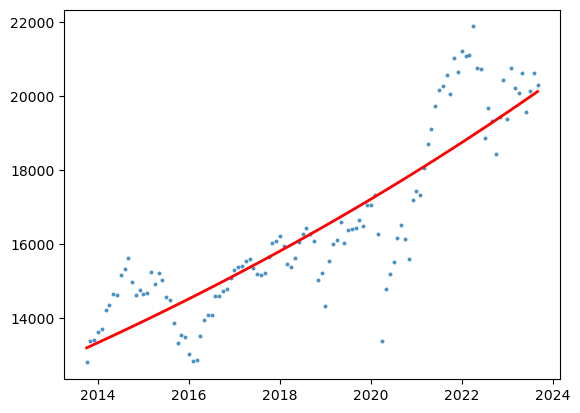

In [11]:
texp = np.linspace(2013.75,2023.75,120,endpoint=False)
yexp = np.exp(cexp[0] + cexp[1]*texp)
plt.plot(texp,yexp,'r',linewidth=2)
plt.scatter(t,y,alpha=0.8,lw=0,s=8);
plt.show()

In [12]:
la.norm(yexp-y.T)

12596.021396691656

The fit is somewhat better than with linear regression, although the difference is not very big. The coefficient $\beta$ is of particular interest here, since 

$$\frac{y(t+1)-y(t)}{y(t)} = \frac{\alpha e^{\beta (t+1)}}{\alpha e^{\beta t}} -1 = e^\beta -1$$

gives the annual return of the stock exchange index under this exponential model. 

In [13]:
math.exp(cexp[1]) -1

0.043586911748686896

The annual return is around 4.4%, which is important information when we want to consider different investment options. 

**Note!** When we transform the system by taking the logarithm, we actually do not get the least squares solution. Instead of minimizing the sum of the squared errors, we minimize the sum of the squares of the *logarithms* of the errors. This means that the fit will be better for smaller values than for large. In this case, it would actually be better to use a *weighted least squares* method instead, but we won't discuss that here, so you can find out more about that on your own if you wish. 